In [1]:
%reset -f

In [2]:
user = "HHegde"
db = f"/Users/{user}/.data/oaklib/phenio.db"

In [3]:
%reload_ext sql
%sql sqlite:///{db}

In [4]:
%sql SELECT * FROM term_association LIMIT 2;

 * sqlite:////Users/HHegde/.data/oaklib/phenio.db
Done.


id,subject,predicate,object,evidence_type,publication,source
uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [5]:
import sqlite3
import pandas as pd
from semsimian import Semsimian
from collections import Counter

In [6]:
conn = sqlite3.connect(db)
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = res.fetchall()

# tables

In [7]:
df_term_association = pd.read_sql_query("SELECT * FROM term_association", conn)
df_term_association.head()

,id,subject,predicate,object,evidence_type,publication,source
0,uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
1,uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
2,uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
3,uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
4,uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [8]:
df_term_association['subject'].str.split(":").str[0].unique()

array(['MONDO', 'HGNC', 'WB', 'MGI', 'RGD', 'Xenbase', 'ZFIN'],
      dtype=object)

In [9]:
df_term_association['object'].str.split(":").str[0].unique()

array(['HP', 'WBPhenotype', 'MP', 'XPO', 'ZP'], dtype=object)

In [10]:
# MGI:1261425 => drosha, ribonuclease type III
df_100 = df_term_association[df_term_association['subject'].str.startswith("MGI:")].sample(n=100, random_state=1)
df_100 = df_100[['subject', 'predicate', 'object']]
df_100

,subject,predicate,object
396014,MGI:1261425,biolink:has_phenotype,MP:0004974
434353,MGI:1858212,biolink:has_phenotype,MP:0005331
374300,MGI:109207,biolink:has_phenotype,MP:0005560
387558,MGI:98475,biolink:has_phenotype,MP:0008872
315680,MGI:97512,biolink:has_phenotype,MP:0005293
...,...,...,...
402503,MGI:88417,biolink:has_phenotype,MP:0001923
350599,MGI:104510,biolink:has_phenotype,MP:0006358
349262,MGI:103289,biolink:has_phenotype,MP:0008476
331444,MGI:98834,biolink:has_phenotype,MP:0003789


In [11]:
df_100['subject'].drop_duplicates()

396014    MGI:1261425
434353    MGI:1858212
374300     MGI:109207
387558      MGI:98475
315680      MGI:97512
             ...     
402503      MGI:88417
350599     MGI:104510
349262     MGI:103289
331444      MGI:98834
472334    MGI:1920719
Name: subject, Length: 100, dtype: object

In [12]:
subject_object_dict = {}
for subject in df_100['subject'].drop_duplicates():
    objects = set(df_100[df_100['subject']==subject]['object'])
    subject_object_dict[subject] = objects


In [13]:
%%time
predicates = ["rdfs:subClassOf", "BFO:0000050"]
semsimian = Semsimian(
            spo=None,
            predicates=predicates,
            pairwise_similarity_attributes=None,
            resource_path=db,
        )


CPU times: user 13.5 s, sys: 1.03 s, total: 14.5 s
Wall time: 15.1 s


In [14]:

subject_prefixes = ["MGI:"]
# object_terms = set(df_100['object'].drop_duplicates())
assoc_predicate = {"biolink:has_phenotype"}
include_similarity_object = True
limit = 50


In [15]:
%%time

search_type = "flat"
flat_result = {}
for subj, obj in subject_object_dict.items():
    flat_result[subj] = semsimian.associations_search(
                assoc_predicate,
                set(obj),
                include_similarity_object,
                search_type,
                None,
                subject_prefixes,
                limit,
            )

Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cach

In [16]:
len(flat_result)

100

In [17]:
%%time

search_type = "full"
full_result = {}
for subj, obj in subject_object_dict.items():
    full_result[subj] = semsimian.associations_search(
                assoc_predicate,
                set(obj),
                include_similarity_object,
                search_type,
                None,
                subject_prefixes,
                limit,
            )

Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypefull"
Using cach

In [18]:
len(full_result)

100

In [19]:
%%time

search_type = "hybrid"
hybrid_result = {}
for subj, obj in subject_object_dict.items():
    hybrid_result[subj] = semsimian.associations_search(
                assoc_predicate,
                set(obj),
                include_similarity_object,
                search_type,
                None,
                subject_prefixes,
                limit,
            )

Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cache! "MGI:biolink:has_phenotypeflat"
Using cache! "MGI:biolink:has_phenotypefull"
Using cach

In [20]:
len(hybrid_result)

100

In [21]:
def get_search_terms_for_input_term(dictionary:dict):
    result_dict = {}
    for k, v in dictionary.items():
        result_dict[k] = [curie for _,_,curie in v]
    return result_dict
        

In [22]:
full_result_terms = get_search_terms_for_input_term(full_result)
flat_result_terms = get_search_terms_for_input_term(flat_result)
hybrid_result_terms = get_search_terms_for_input_term(hybrid_result)

In [23]:
def get_overlap(dict1, dict2):
    input_term_overlap = {}
    for term, result in dict1.items():
        common = set(result).intersection(set(dict2[term]))
        total = len(set(dict2[term]) | set(result))
        overlap = len(common) / total * 100
        input_term_overlap[term] = overlap
    return input_term_overlap
    

In [24]:
# input_term_full_flat_overlap = get_overlap(full_result_terms, flat_result_terms)
input_term_full_hybrid_overlap = get_overlap(full_result_terms, hybrid_result_terms)
input_term_full_flat_overlap = get_overlap(full_result_terms, flat_result_terms)
input_term_flat_hybrid_overlap = get_overlap(flat_result_terms, hybrid_result_terms)

input_term_flat_hybrid_overlap
# print(len(set(full_result_terms['MGI:1261425']).intersection(set(full_result_terms['MGI:1261425']))))

{'MGI:1261425': 38.88888888888889,
 'MGI:1858212': 26.582278481012654,
 'MGI:109207': 29.87012987012987,
 'MGI:98475': 11.11111111111111,
 'MGI:97512': 33.33333333333333,
 'MGI:88291': 42.857142857142854,
 'MGI:1914362': 35.13513513513514,
 'MGI:1924285': 20.481927710843372,
 'MGI:2385958': 11.11111111111111,
 'MGI:1313275': 17.647058823529413,
 'MGI:2177178': 19.047619047619047,
 'MGI:98973': 13.636363636363635,
 'MGI:1341163': 8.695652173913043,
 'MGI:97311': 35.13513513513514,
 'MGI:88258': 25.0,
 'MGI:1915325': 40.845070422535215,
 'MGI:96083': 23.456790123456788,
 'MGI:95808': 33.33333333333333,
 'MGI:104779': 9.89010989010989,
 'MGI:104673': 42.857142857142854,
 'MGI:1321392': 53.84615384615385,
 'MGI:97348': 42.857142857142854,
 'MGI:1339999': 35.13513513513514,
 'MGI:88145': 53.84615384615385,
 'MGI:1098280': 40.845070422535215,
 'MGI:1891740': 2.0408163265306123,
 'MGI:1346872': 25.0,
 'MGI:105098': 25.0,
 'MGI:97503': 31.57894736842105,
 'MGI:2673128': 25.0,
 'MGI:1196326': 2

### Plot params

In [25]:
import matplotlib.pyplot as plt



def plot_graph(data, title):
    # Create lists for the plot
    keys = list(data.keys())
    values = list(data.values())
    
    # Create a bar chart
    plt.figure(figsize=(20,10))  # Increase the size as needed
    bars = plt.bar(range(len(data)), values, tick_label=keys)
    
    # Rotate the x-axis labels so they don't overlap
    plt.xticks(rotation=90)
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Keys')
    plt.ylabel('Values')

    # Loop over the bars and add the value on top
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', rotation=45)  # va: vertical alignment
    
    # Show the plot
    plt.show()


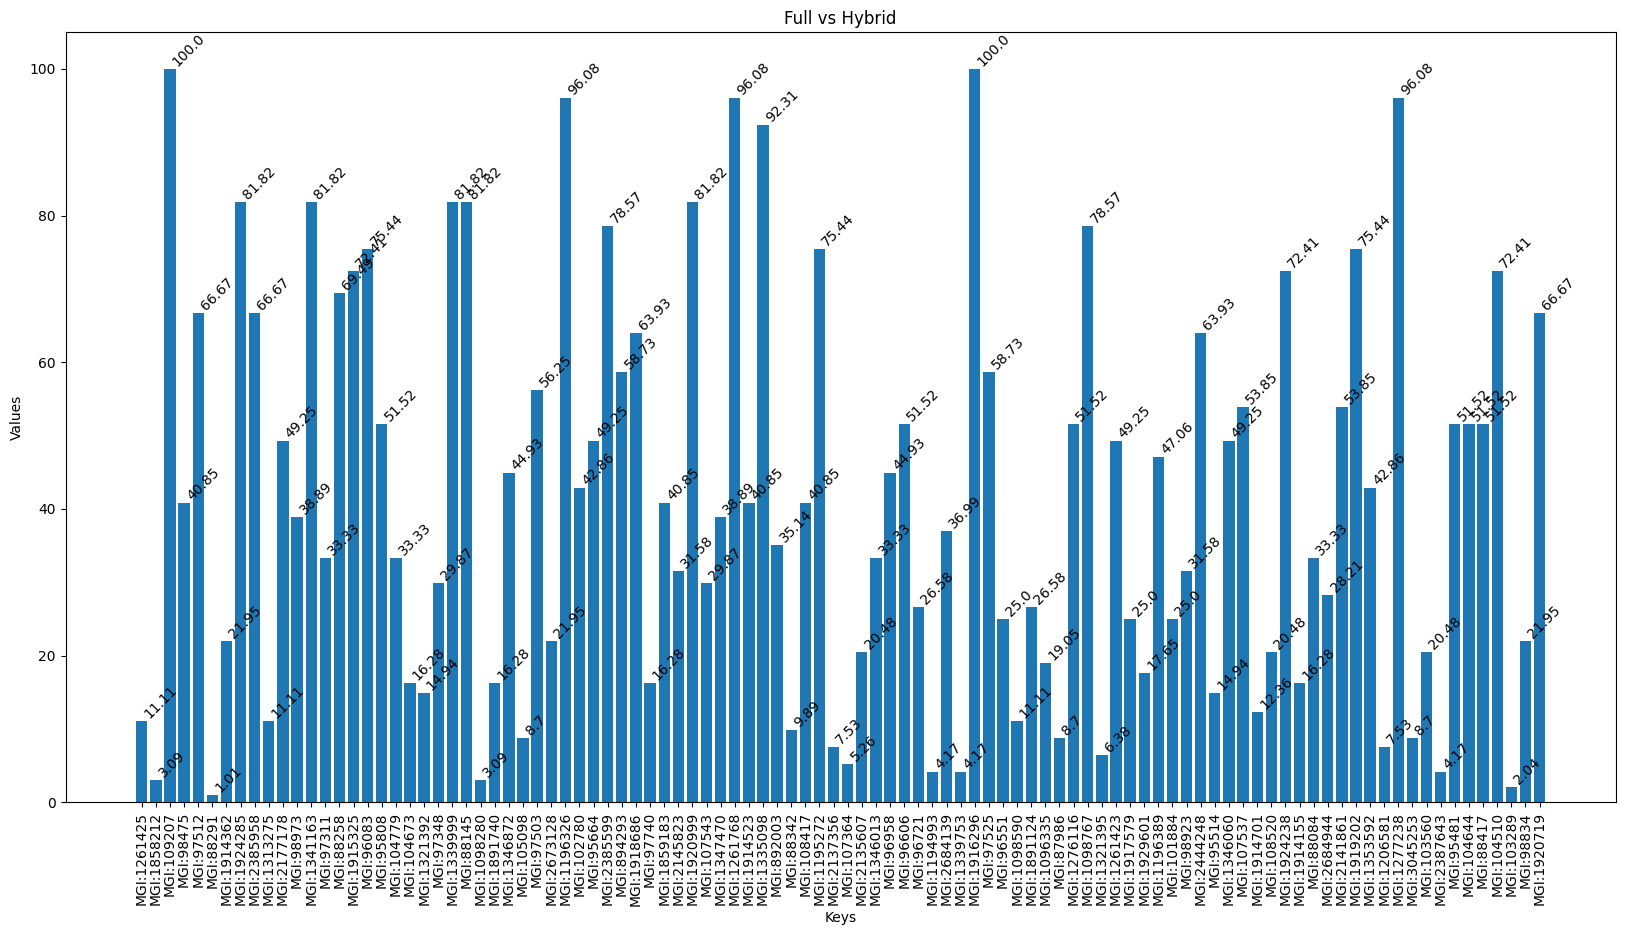

In [26]:

plot_graph(input_term_full_hybrid_overlap, "Full vs Hybrid")

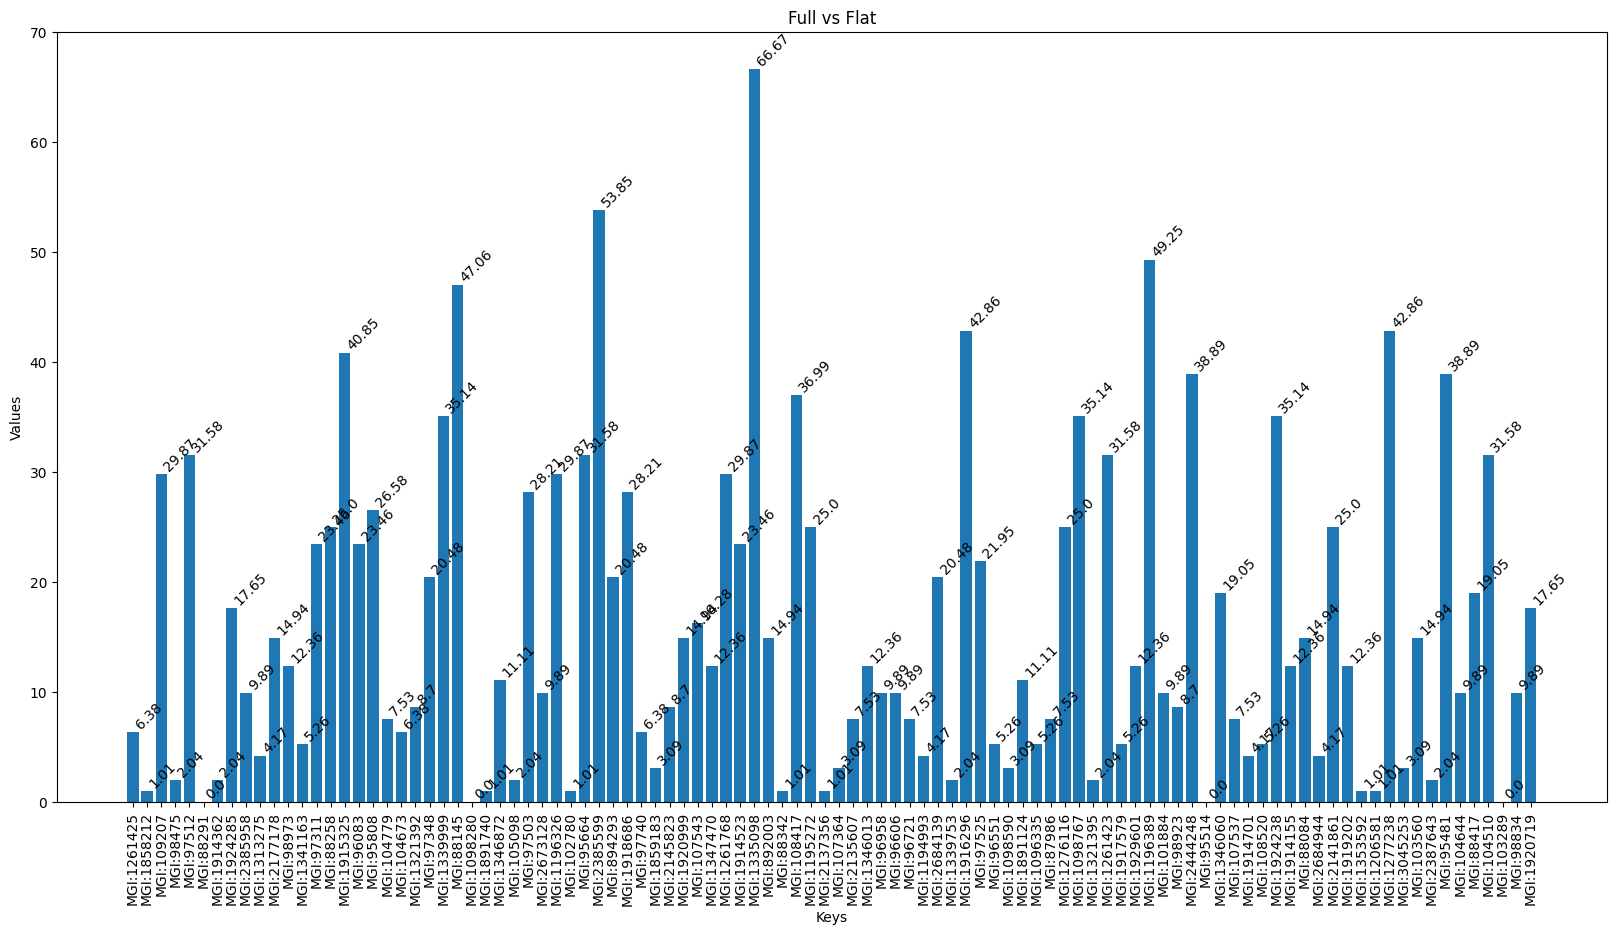

In [27]:

plot_graph(input_term_full_flat_overlap, "Full vs Flat")

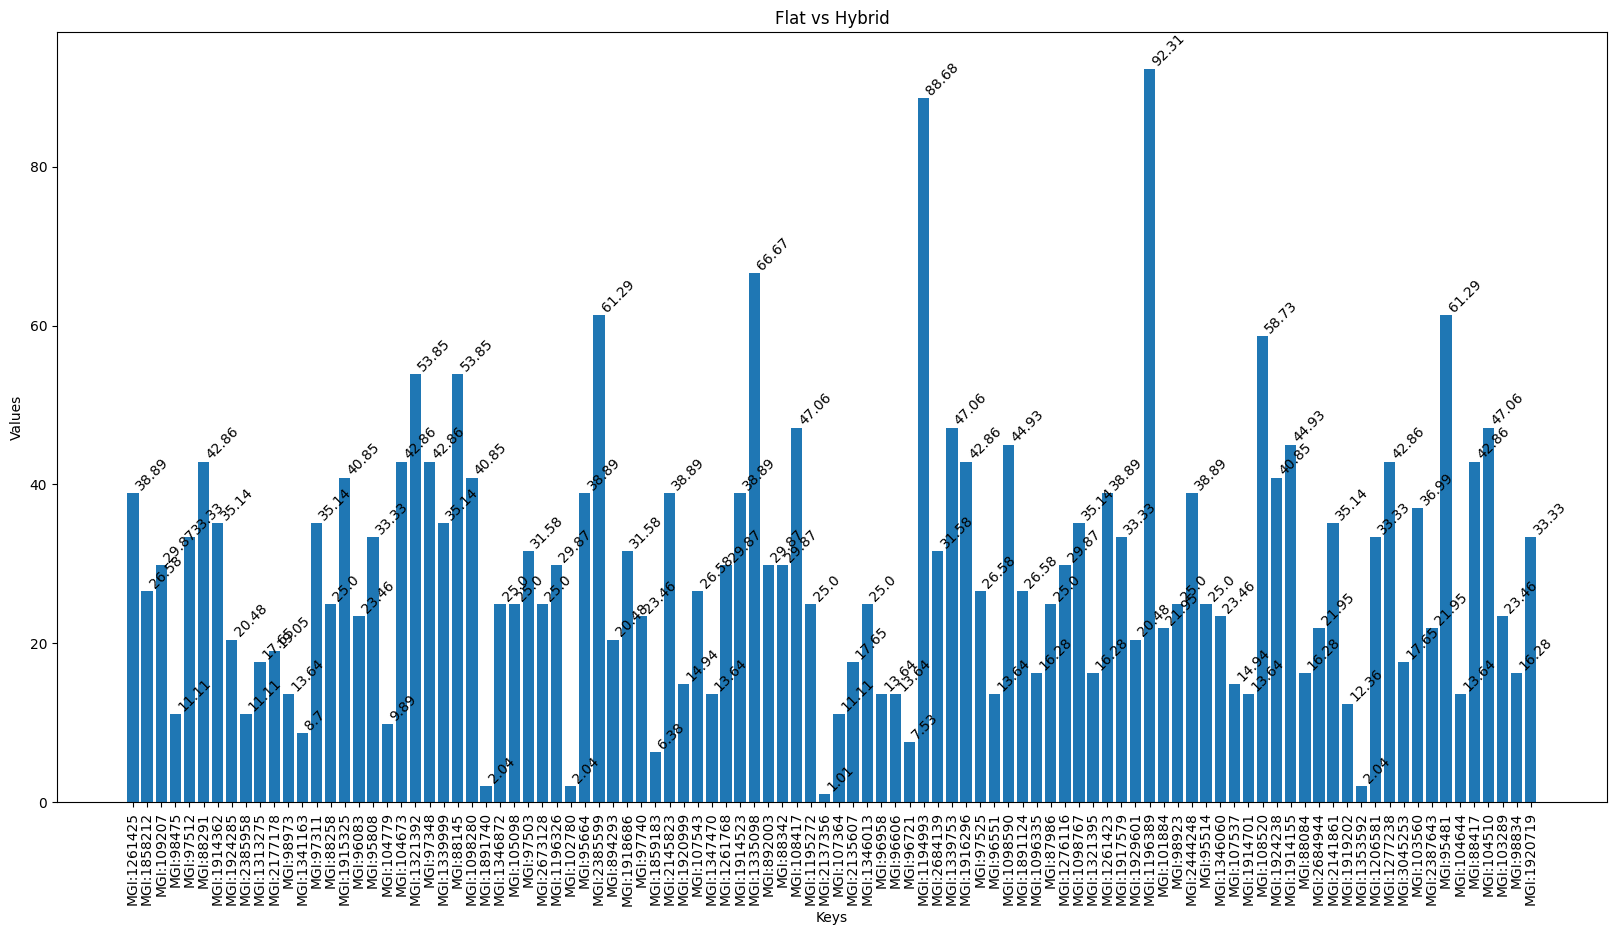

In [28]:

plot_graph(input_term_flat_hybrid_overlap, "Flat vs Hybrid")